# 2.b

In [197]:
import numpy as np

class NeuralNet:
    def __init__(self, lr = 0.001):
        self.lr = 0.001
        self.mult = lambda x,w,bias : x*w+bias

        self.tanh_diff = lambda x: (1+np.tanh(x))*(1-np.tanh(x))
        
        
        
        self.w0 = 0.01
        self.w1 = 0.01

        self.b0 = 0.01
        self.b1 = 0.01
        
        self.computational_history = []

    def forward(self, x):
        self.computational_history = []
        self.computational_history.append(x)
        x = np.tanh(self.mult(x,self.w0, self.b0))
        self.computational_history.append(x)

        x = np.tanh(self.mult(x,self.w1, self.b1))
        return x
    
    def backward(self, loss):
        loss = self.tanh_diff(loss)
        db1 = loss
        loss, dw1 = loss * self.w1, loss*self.computational_history.pop()
        
        loss = self.tanh_diff(loss)
        db0 = loss
        dw0 = loss*self.computational_history.pop()
#         print(dw1, dw0, db1,db0)
#         print(self.w1, self.w0, self.b1,self.b0)
#         print("="*100)
        self.b1 -= db1 * self.lr
        self.b0 -= db0 * self.lr
        self.w1 -= dw1 * self.lr
        self.w0 -= dw0 * self.lr
        

In [198]:
A = NeuralNet(lr = 0.1)

## 학습되는지 테스트

In [203]:
ans_w0 = 7.0
ans_w1 = -6.0

ans_b0 = -13.0
ans_b1 = 5.0


In [215]:
from tqdm import tqdm
losses = []
dist = []
for i in range(10000):
    x= np.random.random()/5 - 0.1
    y = np.tanh(A.mult(x,ans_w0, ans_b0))
    y = np.tanh(A.mult(y,ans_w1, ans_b1))
    
    x = A.forward(x)
    dist.append(abs(x-y))
    loss = abs(y-x)
    losses.append(loss**2)
    A.backward(loss)
    A.lr *= 0.999
#     if i % 2 == 1:
#         print(np.mean(losses))
#         print(ans_w0- A.w0, ans_w1- A.w1,ans_b0- A.b0,ans_b1- A.b1)
losses = [np.mean(losses[i*50:(i+1)*50]) for i in range(len(losses)//50)]

In [205]:
print(A.w0, A.w1, A.b0, A.b1)

0.009421274001191651 0.33041909338687403 0.9956392345536486 0.6617294111005418


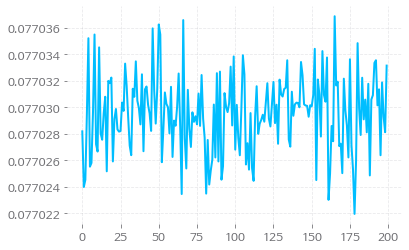

In [217]:
from matplotlib import pyplot as plt
plt.plot(losses)
plt.show()

#### 벡터 연산이 아니므로 차원 변경이 이루어지지 않아 학습이 되지 않는다

# 2.c

In [584]:
import numpy as np

class NeuralNet:
    def __init__(self):
        self.w1 = 3.0
        self.w2 = 3.0
        
        
        self.computational_history = []

    def forward(self, x):
        self.computational_history = []
        self.computational_history.append(x)

        x = x*self.w1
        self.computational_history.append(x)
        x = max(0,x)
        self.computational_history.append(x)
        x = x*self.w2
        
        
        return x
    
    def search_derivative(self, loss):
        w2_derivative = self.computational_history.pop() * loss
        loss = self.w2*loss
        loss = loss if 0<self.computational_history.pop() else 0
        
        w1_derivative = self.computational_history.pop() * loss
        print("w1_derivative: ", w1_derivative)
        print("w2_derivative: ", w2_derivative)

In [587]:
A = NeuralNet()
A.forward(-4)

0.0

In [588]:
A.search_derivative(-2)

w1_derivative:  0
w2_derivative:  0
